<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>

# Laboratorio: Construcción Modelo de Clasificación y Evaluación de Métricas

Tras realizar el preprocesamiento de los datos y dejarlos listos para construir modelos, ha llegado el momento de dar el siguiente paso: desarrollar tu **primer modelo de clasificación**.

El objetivo de este laboratorio es implementar un modelo de clasificación inicial utilizando **Regresión Logística (Logistic Regression)**. Este modelo te permitirá obtener las primeras predicciones para identificar transacciones normales y anómalas, así como evaluar su desempeño utilizando métricas estándar.

Además, deberás evaluar si el modelo está en riesgo de **overfitting**, asegurando que nuestras predicciones sean consistentes tanto en los datos de entrenamiento como en los de prueba.


## Objetivo del Laboratorio

1. Entrenar un modelo de **Regresión Logística** para predecir si una transacción es "Normal" o "Anómala".

2. Evaluar el desempeño del modelo utilizando métricas como:

   - Precisión (Accuracy).

   - Matriz de confusión.

   - Precisión (Precision), exhaustividad (Recall) y F1-Score.

   - Área bajo la curva ROC (AUC-ROC).

3. Determinar si el modelo presenta **overfitting** o **underfitting**, analizando el rendimiento en los datos de entrenamiento y prueba.


In [32]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Funciones
# -----------------------------------------------------------------------
import sys
sys.path.append('../') #pongo los 2 puntos para que salga de la carpeta
import src.funciones as f
import src.soporte_logistica_preprocesamiento as slp
import  src.soporte_ajuste_logistica as sal

# Para realizar la clasificación y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve

In [50]:
def calcular_metricas(y_train, y_test, pred_train, pred_test):
    """
    Calcula métricas de rendimiento para el modelo seleccionado.
    """

    # Métricas
    metricas_train = {
        "accuracy": accuracy_score(y_train, pred_train),
        "precision": precision_score(y_train, pred_train, average='weighted', zero_division=0),
        "recall": recall_score(y_train, pred_train, average='weighted', zero_division=0),
        "f1": f1_score(y_train, pred_train, average='weighted', zero_division=0)
    }
    metricas_test = {
        "accuracy": accuracy_score(y_test, pred_test),
        "precision": precision_score(y_test, pred_test, average='weighted', zero_division=0),
        "recall": recall_score(y_test, pred_test, average='weighted', zero_division=0),
        "f1": f1_score(y_test, pred_test, average='weighted', zero_division=0)
    }

    return pd.DataFrame({"train": metricas_train, "test": metricas_test})

In [34]:
df = pd.read_pickle('datos/datos_pt2.csv').reset_index(drop=True)
df.head()

,amount_minmax,is_fraudulent,purchase_category,customer_age_minmax,card_type_American Express,card_type_Discover,card_type_MasterCard,card_type_Visa,location_City-1,location_City-10,...,location_City-46,location_City-47,location_City-48,location_City-49,location_City-5,location_City-50,location_City-6,location_City-7,location_City-8,location_City-9
0,0.575423,0,0.524610,0.480769,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.189301,1,0.486978,0.826923,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.123960,1,0.524610,0.750000,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.761671,1,0.505313,0.788462,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.188153,1,0.513546,0.346154,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
# instanciamos la clase de regresión logistica
logistica = sal.AnalisisModelosClasificacion(dataframe = df, variable_dependiente = "is_fraudulent")
logistica.y_test

6252    1
4684    0
1731    0
4742    1
4521    1
       ..
6412    0
8285    0
7853    0
1095    1
6929    1
Name: is_fraudulent, Length: 2000, dtype: int32

In [35]:
# instanciamos la clase de regresión logistica
logistica = sal.AnalisisModelosClasificacion(dataframe = df, variable_dependiente = "is_fraudulent")

# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("logistic_regression")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados = logistica.calcular_metricas(modelo_nombre =  "logistic_regression" )
df_resultados.head()

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:349: Convergen

,train,test
accuracy,0.504250,0.517000
precision,0.254268,0.267289
recall,0.504250,0.517000
f1,0.338066,0.352392
kappa,0.000000,0.000000


In [36]:
x = df.drop(columns='is_fraudulent')
y = df['is_fraudulent']

In [48]:
x_train, x_test,y_train, y_test = train_test_split(x,y,train_size=0.7, random_state=42, shuffle=True)
modelo_logistica = LogisticRegression()
modelo_logistica.fit(x_train,y_train)

y_pred_test = modelo_logistica.predict(x_test)
y_pred_test[:10]
y_pred_train = modelo_logistica.predict(x_train)

y_pred_test_prob = modelo_logistica.predict_proba(x_test)[:,1] # probabilidad de esa predicción

In [51]:
calcular_metricas(y_train, y_test, y_pred_train, y_pred_test)

,train,test
accuracy,0.534429,0.512667
precision,0.534566,0.511547
recall,0.534429,0.512667
f1,0.533055,0.511467


In [45]:
regressor = LogisticRegression()
regressor.fit(x_train, y_train)

LogisticRegression()

In [38]:
print('Prediccion', y_pred_test[:3])
print('Probabiliadad de predicción', y_pred_test_prob[:3])

Prediccion [0 1 0]
Probabiliadad de predicción [0.47473206 0.52634927 0.46709636]


In [39]:
df_pred = pd.concat([y_test.reset_index(drop=True), pd.DataFrame(y_pred_test)], axis=1) 
df_pred.columns = ['Real', 'Predicho']

In [40]:
df_pred

,Real,Predicho
0,1,0
1,0,1
2,0,0
3,1,1
4,1,1
...,...,...
2995,0,1
2996,0,1
2997,0,1
2998,0,1


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_prob)

Text(8.222222222222221, 0.5, 'Reales')

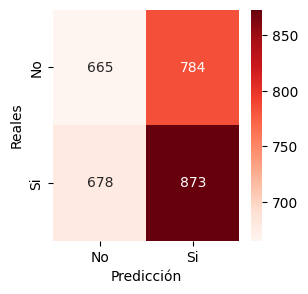

In [42]:
matriz_confusion = confusion_matrix(y_test,y_pred_test) #primero test, luego pred
plt.figure(figsize=(3,3))
etiquetas = ['No', 'Si']
sns.heatmap(matriz_confusion, 
            annot=True, # coloca números
            fmt='d',
            xticklabels=etiquetas,
            yticklabels=etiquetas,
            cmap='Reds') # formato entero
plt.xlabel(('Predicción'))
plt.ylabel(('Reales'))


Text(0, 0.5, 'Ratio de verdaderos positivos')

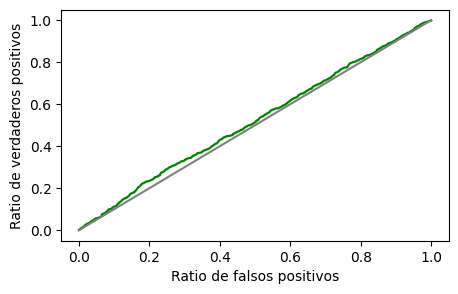

In [43]:
plt.figure(figsize=(5,3))
sns.lineplot(x=fpr, y=tpr, color='green')
sns.lineplot(x=[0,1], y=[0,1], color = 'grey')
plt.xlabel('Ratio de falsos positivos')
plt.ylabel('Ratio de verdaderos positivos')